In [117]:
from box import Box
from utils.util import read_yaml
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno

import numpy as np
import plotly.figure_factory as ff
import seaborn as sns
import plotly.graph_objects as go

import plotly.io as pio
# pio.renderers.default = 'notebook'

### Data Loading

In [118]:
cfg = Box(read_yaml('../src/conf/config.yaml'))

In [119]:
df_his = pd.read_csv(cfg.path.new_historical_data, parse_dates=['Date'], index_col=['Date'])
df_his.drop(columns=['OXO-5TIC605 Augusta', 'OXO-5FIC618D Augusta'], inplace=True)
df_his.head()

OXO-5FI635C Augusta  OXO-5FI661A Augusta   
Date                                                            
2022-01-01 00:00:00          6493.205841         26131.689128  \
2022-01-01 01:00:00          6553.837329         25792.423096   
2022-01-01 02:00:00          6747.690587         25844.259668   
2022-01-01 03:00:00          7020.786387         25637.994417   
2022-01-01 04:00:00          7222.092607         26013.394971   

                     OXO-5FI696 Augusta  OXO-5FIC132 Augusta   
Date                                                           
2022-01-01 00:00:00        10568.619936          4307.583333  \
2022-01-01 01:00:00        10927.590640          4315.027778   
2022-01-01 02:00:00        10967.855347          4188.027778   
2022-01-01 03:00:00        10961.588428          4638.777778   
2022-01-01 04:00:00        10958.425991          5342.583333   

                     OXO-5FIC600 Augusta  OXO-5FIC601 Augusta   
Date                                                            
2022-01-01 00:00:00          2656.727802            79.867193  \
2022-01-01 01:00:00          2699.316972            80.967132   
2022-01-01 02:00:00          2681.788005            80.710679   
2022-01-01 03:00:00          2684.838794            80.599889   
2022-01-01 04:00:00          2637.327844            78.548448   

                     OXO-5FIC602 Augusta  OXO-5FIC603 Augusta   
Date                                                            
2022-01-01 00:00:00                  0.0          7057.960776  \
2022-01-01 01:00:00                  0.0          7318.575860   
2022-01-01 02:00:00                  0.0          7367.053687   
2022-01-01 03:00:00                  0.0          7387.798947   
2022-01-01 04:00:00                  0.0          7388.195968   

                     OXO-5FIC606A Augusta  OXO-5FIC606C Augusta  ...   
Date                                                             ...   
2022-01-01 00:00:00                   0.0           1230.268679  ...  \
2022-01-01 01:00:00                   0.0           1265.607499  ...   
2022-01-01 02:00:00                   0.0           1271.016994  ...   
2022-01-01 03:00:00                   0.0           1271.558446  ...   
2022-01-01 04:00:00                   0.0           1279.923294  ...   

                     OXO-5TIC602 Augusta  OXO-5TIC603 Augusta   
Date                                                            
2022-01-01 00:00:00           130.043583           132.999879  \
2022-01-01 01:00:00           129.884263           133.099090   
2022-01-01 02:00:00           129.803513           132.958711   
2022-01-01 03:00:00           129.960751           132.964103   
2022-01-01 04:00:00           130.044659           132.967727   

                     OXO-5TIC604 Augusta  OXO-5TIC606 Augusta   
Date                                                            
2022-01-01 00:00:00           128.755723           131.075381  \
2022-01-01 01:00:00           128.653404           131.759078   
2022-01-01 02:00:00           128.454355           132.020698   
2022-01-01 03:00:00           128.378428           131.986591   
2022-01-01 04:00:00           128.266104           132.013790   

                     OXO-5TIC607 Augusta  OXO-5TIC659 Augusta   
Date                                                            
2022-01-01 00:00:00           127.737945           305.327834  \
2022-01-01 01:00:00           128.455197           303.294933   
2022-01-01 02:00:00           128.587924           303.418461   
2022-01-01 03:00:00           128.458877           304.509140   
2022-01-01 04:00:00           128.511065           301.192034   

                     OXO-_5FI658A Augusta  OXO-_5FI659A Augusta   
Date                                                              
2022-01-01 00:00:00          22820.790479          24146.639486  \
2022-01-01 01:00:00          22475.836784          23834.788965   
2022-01-01 02:00:00          22554.598568          23904.185140

In [120]:
df_recent = pd.read_csv(cfg.path.new_recent_data, parse_dates=['Date'], index_col=['Date'])
df_recent.head()

T2.OXO.5FI635C Augusta  T2.OXO.5FI661A Augusta   
Date                                                                  
2023-07-20 18:00:00                     0.0              342.360916  \
2023-07-20 19:00:00                     0.0              306.103144   
2023-07-20 20:00:00                     0.0              285.012666   
2023-07-20 21:00:00                     0.0              308.592826   
2023-07-20 22:00:00                     0.0              296.921573   

                     T2.OXO.5FI696 Augusta  T2.OXO.5FIC132 Augusta   
Date                                                                 
2023-07-20 18:00:00                    0.0                4.781250  \
2023-07-20 19:00:00                    0.0                4.702970   
2023-07-20 20:00:00                    0.0                4.672897   
2023-07-20 21:00:00                    0.0                4.846491   
2023-07-20 22:00:00                    0.0                4.848485   

                     T2.OXO.5FIC600 Augusta  T2.OXO.5FIC601 Augusta   
Date                                                                  
2023-07-20 18:00:00              192.675444                     0.0  \
2023-07-20 19:00:00              191.860954                     0.0   
2023-07-20 20:00:00              191.318903                     0.0   
2023-07-20 21:00:00              190.860208                     0.0   
2023-07-20 22:00:00              190.165348                     0.0   

                     T2.OXO.5FIC602 Augusta  T2.OXO.5FIC603 Augusta   
Date                                                                  
2023-07-20 18:00:00                     0.0                     0.0  \
2023-07-20 19:00:00                     0.0                     0.0   
2023-07-20 20:00:00                     0.0                     0.0   
2023-07-20 21:00:00                     0.0                     0.0   
2023-07-20 22:00:00                     0.0                     0.0   

                     T2.OXO.5FIC606A Augusta  T2.OXO.5FIC606C Augusta  ...   
Date                                                                   ...   
2023-07-20 18:00:00                      0.0                 8.023804  ...  \
2023-07-20 19:00:00                      0.0                 9.163692  ...   
2023-07-20 20:00:00                      0.0                15.801976  ...   
2023-07-20 21:00:00                      0.0                13.044364  ...   
2023-07-20 22:00:00                      0.0                10.105416  ...   

                     T2.OXO.5TIC602 Augusta  T2.OXO.5TIC603 Augusta   
Date                                                                  
2023-07-20 18:00:00                    50.0                    50.0  \
2023-07-20 19:00:00                    50.0                    50.0   
2023-07-20 20:00:00                    50.0                    50.0   
2023-07-20 21:00:00                    50.0                    50.0   
2023-07-20 22:00:00                    50.0                    50.0   

                     T2.OXO.5TIC604 Augusta  T2.OXO.5TIC606 Augusta   
Date                                                                  
2023-07-20 18:00:00                    50.0                    50.0  \
2023-07-20 19:00:00                    50.0                    50.0   
2023-07-20 20:00:00                    50.0                    50.0   
2023-07-20 21:00:00                    50.0                    50.0   
2023-07-20 22:00:00                    50.0                    50.0   

                     T2.OXO.5TIC607 Augusta  T2.OXO.5TIC659 Augusta   
Date                                                                  
2023-07-20 18:00:00                    50.0               34.713420  \
2023-07-20 19:00:00                    50.0               34.079044   
2023-07-20 20:00:00                    50.0               33.464267   
2023-07-20 21:00:00                    50.0               33.008540   
2023-07-20 22:00:00                    50.0               32.409831

In [121]:
# delete the first 3 str characters for the column names of df_recent
df_recent.columns = [col[3:] for col in df_recent.columns]
# replace . with - in the column names of df_recent
df_recent.columns = [col.replace('.', '-') for col in df_recent.columns]
df_recent.head()

OXO-5FI635C Augusta  OXO-5FI661A Augusta   
Date                                                            
2023-07-20 18:00:00                  0.0           342.360916  \
2023-07-20 19:00:00                  0.0           306.103144   
2023-07-20 20:00:00                  0.0           285.012666   
2023-07-20 21:00:00                  0.0           308.592826   
2023-07-20 22:00:00                  0.0           296.921573   

                     OXO-5FI696 Augusta  OXO-5FIC132 Augusta   
Date                                                           
2023-07-20 18:00:00                 0.0             4.781250  \
2023-07-20 19:00:00                 0.0             4.702970   
2023-07-20 20:00:00                 0.0             4.672897   
2023-07-20 21:00:00                 0.0             4.846491   
2023-07-20 22:00:00                 0.0             4.848485   

                     OXO-5FIC600 Augusta  OXO-5FIC601 Augusta   
Date                                                            
2023-07-20 18:00:00           192.675444                  0.0  \
2023-07-20 19:00:00           191.860954                  0.0   
2023-07-20 20:00:00           191.318903                  0.0   
2023-07-20 21:00:00           190.860208                  0.0   
2023-07-20 22:00:00           190.165348                  0.0   

                     OXO-5FIC602 Augusta  OXO-5FIC603 Augusta   
Date                                                            
2023-07-20 18:00:00                  0.0                  0.0  \
2023-07-20 19:00:00                  0.0                  0.0   
2023-07-20 20:00:00                  0.0                  0.0   
2023-07-20 21:00:00                  0.0                  0.0   
2023-07-20 22:00:00                  0.0                  0.0   

                     OXO-5FIC606A Augusta  OXO-5FIC606C Augusta  ...   
Date                                                             ...   
2023-07-20 18:00:00                   0.0              8.023804  ...  \
2023-07-20 19:00:00                   0.0              9.163692  ...   
2023-07-20 20:00:00                   0.0             15.801976  ...   
2023-07-20 21:00:00                   0.0             13.044364  ...   
2023-07-20 22:00:00                   0.0             10.105416  ...   

                     OXO-5TIC602 Augusta  OXO-5TIC603 Augusta   
Date                                                            
2023-07-20 18:00:00                 50.0                 50.0  \
2023-07-20 19:00:00                 50.0                 50.0   
2023-07-20 20:00:00                 50.0                 50.0   
2023-07-20 21:00:00                 50.0                 50.0   
2023-07-20 22:00:00                 50.0                 50.0   

                     OXO-5TIC604 Augusta  OXO-5TIC606 Augusta   
Date                                                            
2023-07-20 18:00:00                 50.0                 50.0  \
2023-07-20 19:00:00                 50.0                 50.0   
2023-07-20 20:00:00                 50.0                 50.0   
2023-07-20 21:00:00                 50.0                 50.0   
2023-07-20 22:00:00                 50.0                 50.0   

                     OXO-5TIC607 Augusta  OXO-5TIC659 Augusta   
Date                                                            
2023-07-20 18:00:00                 50.0            34.713420  \
2023-07-20 19:00:00                 50.0            34.079044   
2023-07-20 20:00:00                 50.0            33.464267   
2023-07-20 21:00:00                 50.0            33.008540   
2023-07-20 22:00:00                 50.0            32.409831   

                     OXO-_5FI658A Augusta  OXO-_5FI659A Augusta   
Date                                                              
2023-07-20 18:00:00                   0.0              7.028367  \
2023-07-20 19:00:00                   0.0              4.632559   
2023-07-20 20:00:00                   0.0              5.380488

In [122]:
df_his.columns == df_recent.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [123]:
# merge df_his and df_recent into df
df = pd.concat([df_his, df_recent], axis=0)
df.shape

(12125, 57)

In [124]:
columns = df.columns
target_list = []
for col in columns:
    for tag in ["5FI696", "5FIC612A", "5FIC612B", "5FIC600", "5FIC601"]:
        if tag in col:
            target_list.append(col)
target_list

['OXO-5FI696 Augusta',
 'OXO-5FIC600 Augusta',
 'OXO-5FIC601 Augusta',
 'OXO-5FIC612A Augusta',
 'OXO-5FIC612B Augusta']

In [125]:
# move target_list to the front
df = df[target_list + [col for col in df.columns if col not in target_list]]

In [126]:
# Create a dictionary to map the category to each tag
tag_df = pd.read_excel(cfg.path.tags_info)
# delete the first 3 str characters in the tag name
tag_df['Tag'] = tag_df['Tag'].apply(lambda x: x[3:])
# convert the . into - in the tag name
tag_df['Tag'] = tag_df['Tag'].apply(lambda x: x.replace('.', '-'))

tag_dict = dict(zip(tag_df['Tag'], tag_df['Category']))
print(tag_dict)

{'OXO-5FI635C Augusta': 'Measurement', 'OXO-5FI661A Augusta': 'Measurement', 'OXO-5FI696 Augusta': 'Independent', 'OXO-5FIC132 Augusta': 'Independent', 'OXO-5FIC600 Augusta': 'Target', 'OXO-5FIC601 Augusta': 'Target', 'OXO-5FIC602 Augusta': 'Control', 'OXO-5FIC603 Augusta': 'Control', 'OXO-5FIC606A Augusta': 'Control', 'OXO-5FIC606C Augusta': 'Control', 'OXO-5FIC607 Augusta': 'Control', 'OXO-5FIC609A Augusta': 'Target', 'OXO-5FIC609B Augusta': 'Control', 'OXO-5FIC611A Augusta': 'Control', 'OXO-5FIC611B Augusta': 'Control', 'OXO-5FIC612A Augusta': 'Target', 'OXO-5FIC612B Augusta': 'Target', 'OXO-5FIC618A Augusta': 'Control', 'OXO-5FIC618B Augusta': 'Control', 'OXO-5FIC618C Augusta': 'Control', 'OXO-5FIC618D Augusta': 'Control', 'OXO-5FIC622A Augusta': 'Control', 'OXO-5FIC622B Augusta': 'Control', 'OXO-5FIC622C Augusta': 'Control', 'OXO-5FIC636A Augusta': 'Control', 'OXO-5FIC636B Augusta': 'Control', 'OXO-5FIC636C Augusta': 'Control', 'OXO-5FQI691B Augusta': 'Measurement', 'OXO-5LI633B A

### Missing Values Processing<a name="clean"></a>

In [127]:
# convert 0 to np.nan
# df.replace(0, np.nan, inplace=True)

In [128]:
df.isnull().sum()

OXO-5FI696 Augusta       673
OXO-5FIC600 Augusta      672
OXO-5FIC601 Augusta      674
OXO-5FIC612A Augusta     673
OXO-5FIC612B Augusta     602
OXO-5FI635C Augusta      626
OXO-5FI661A Augusta      673
OXO-5FIC132 Augusta      601
OXO-5FIC602 Augusta      673
OXO-5FIC603 Augusta      674
OXO-5FIC606A Augusta     578
OXO-5FIC606C Augusta     672
OXO-5FIC607 Augusta      674
OXO-5FIC609A Augusta     674
OXO-5FIC609B Augusta     673
OXO-5FIC611A Augusta     674
OXO-5FIC611B Augusta     673
OXO-5FIC618A Augusta     577
OXO-5FIC618B Augusta     673
OXO-5FIC618C Augusta     674
OXO-5FIC622A Augusta     674
OXO-5FIC622B Augusta     674
OXO-5FIC622C Augusta     673
OXO-5FIC636A Augusta     673
OXO-5FIC636B Augusta     650
OXO-5FIC636C Augusta     626
OXO-5FQI691B Augusta     626
OXO-5LI633B Augusta      577
OXO-5LI650F Augusta      673
OXO-5LI651E Augusta      625
OXO-5LI651F Augusta      673
OXO-5LI652E Augusta      673
OXO-5LI652F Augusta      673
OXO-5LI653E Augusta      601
OXO-5LI653F Au

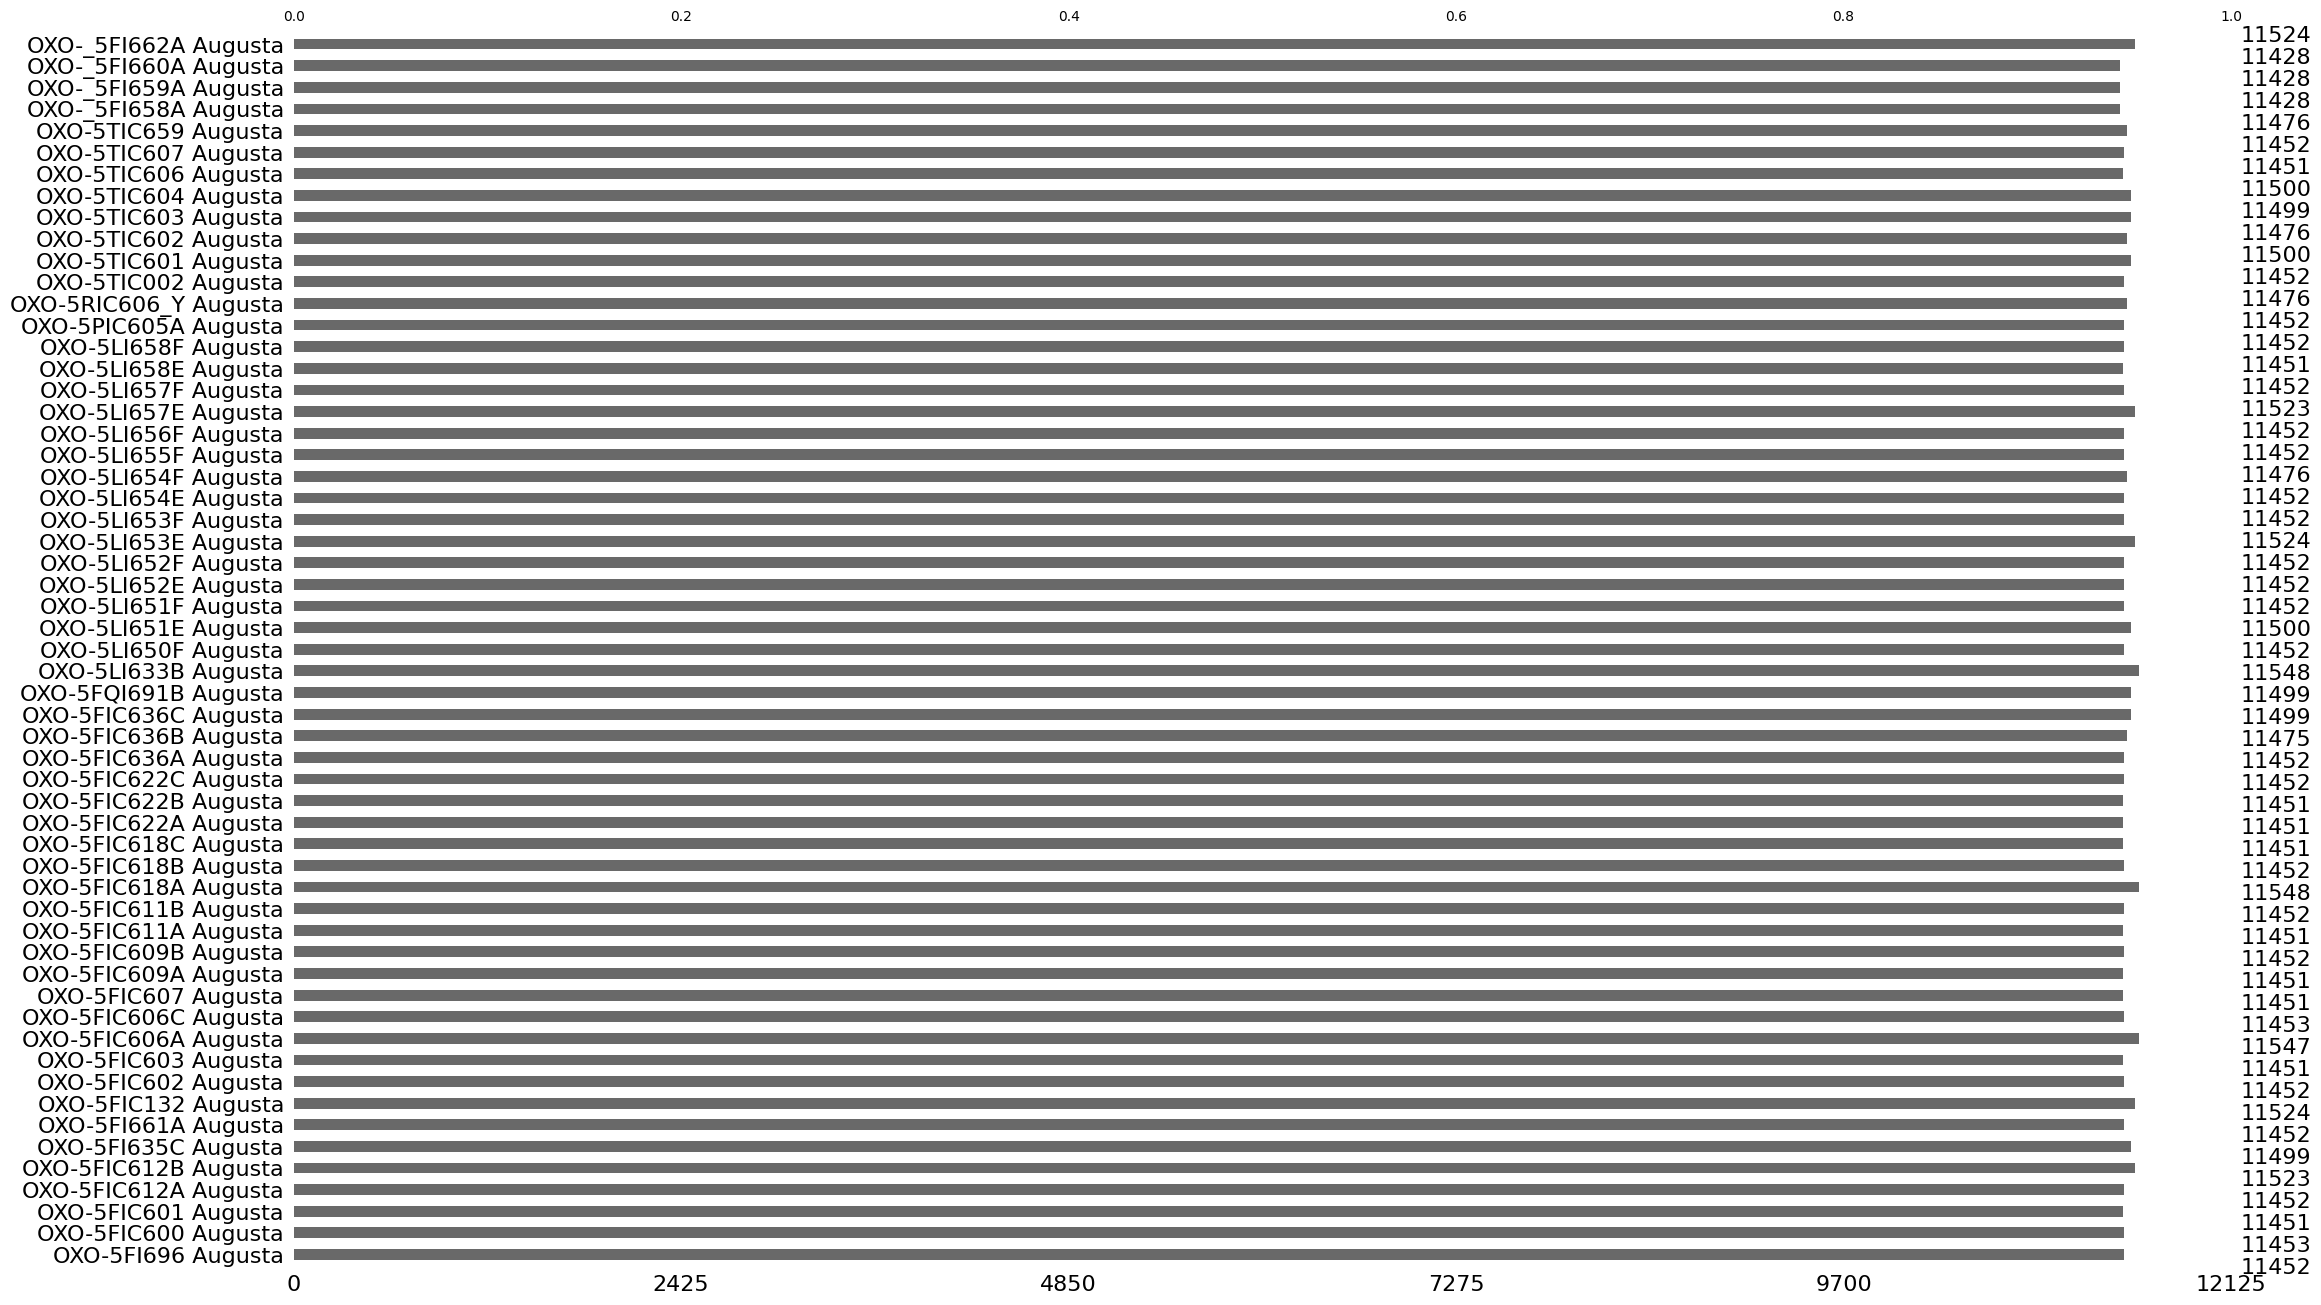

In [129]:
# Displaying a bar chart for the non-missing values of each column
msno.bar(df)
plt.show()

In [130]:
# drop rows with missing values in the target_list
df = df.dropna(subset=target_list)
df.shape

(11451, 57)

In [131]:
pd.isnull(df).sum()[pd.isnull(df).sum() / df.shape[0] > 0.5]

Series([], dtype: int64)

In [132]:
del_cols = [i for i in df.columns if df[i].isnull().sum() / df.shape[0] > 0.5]
print(del_cols)

[]


In [133]:
# drop columns with more than 40% missing values
# for col in del_cols:
#     if col not in target_list and tag_dict[col] != 'Control':
#         df.drop(columns=col, inplace=True)
# for col in del_cols:
#     if col not in target_list:
#         df.drop(columns=col, inplace=True)

In [134]:
# Check if there are deleted successful
df.shape

(11451, 57)

In [135]:
# Fill the rest with missing values
# fill_cols = [i for i in df.columns if df[i].isnull().sum()>0]
# print(fill_cols)
# print(len(fill_cols))

In [136]:
# # fill in the missing values with the mean of each column
# for j in fill_cols:
#     df[j]=df[j].fillna(df[j].mean())

# # Check if there is still a column that has missing values
# fill_cols = [i for i in df.columns if df[i].isnull().sum()>0]
# print(fill_cols)

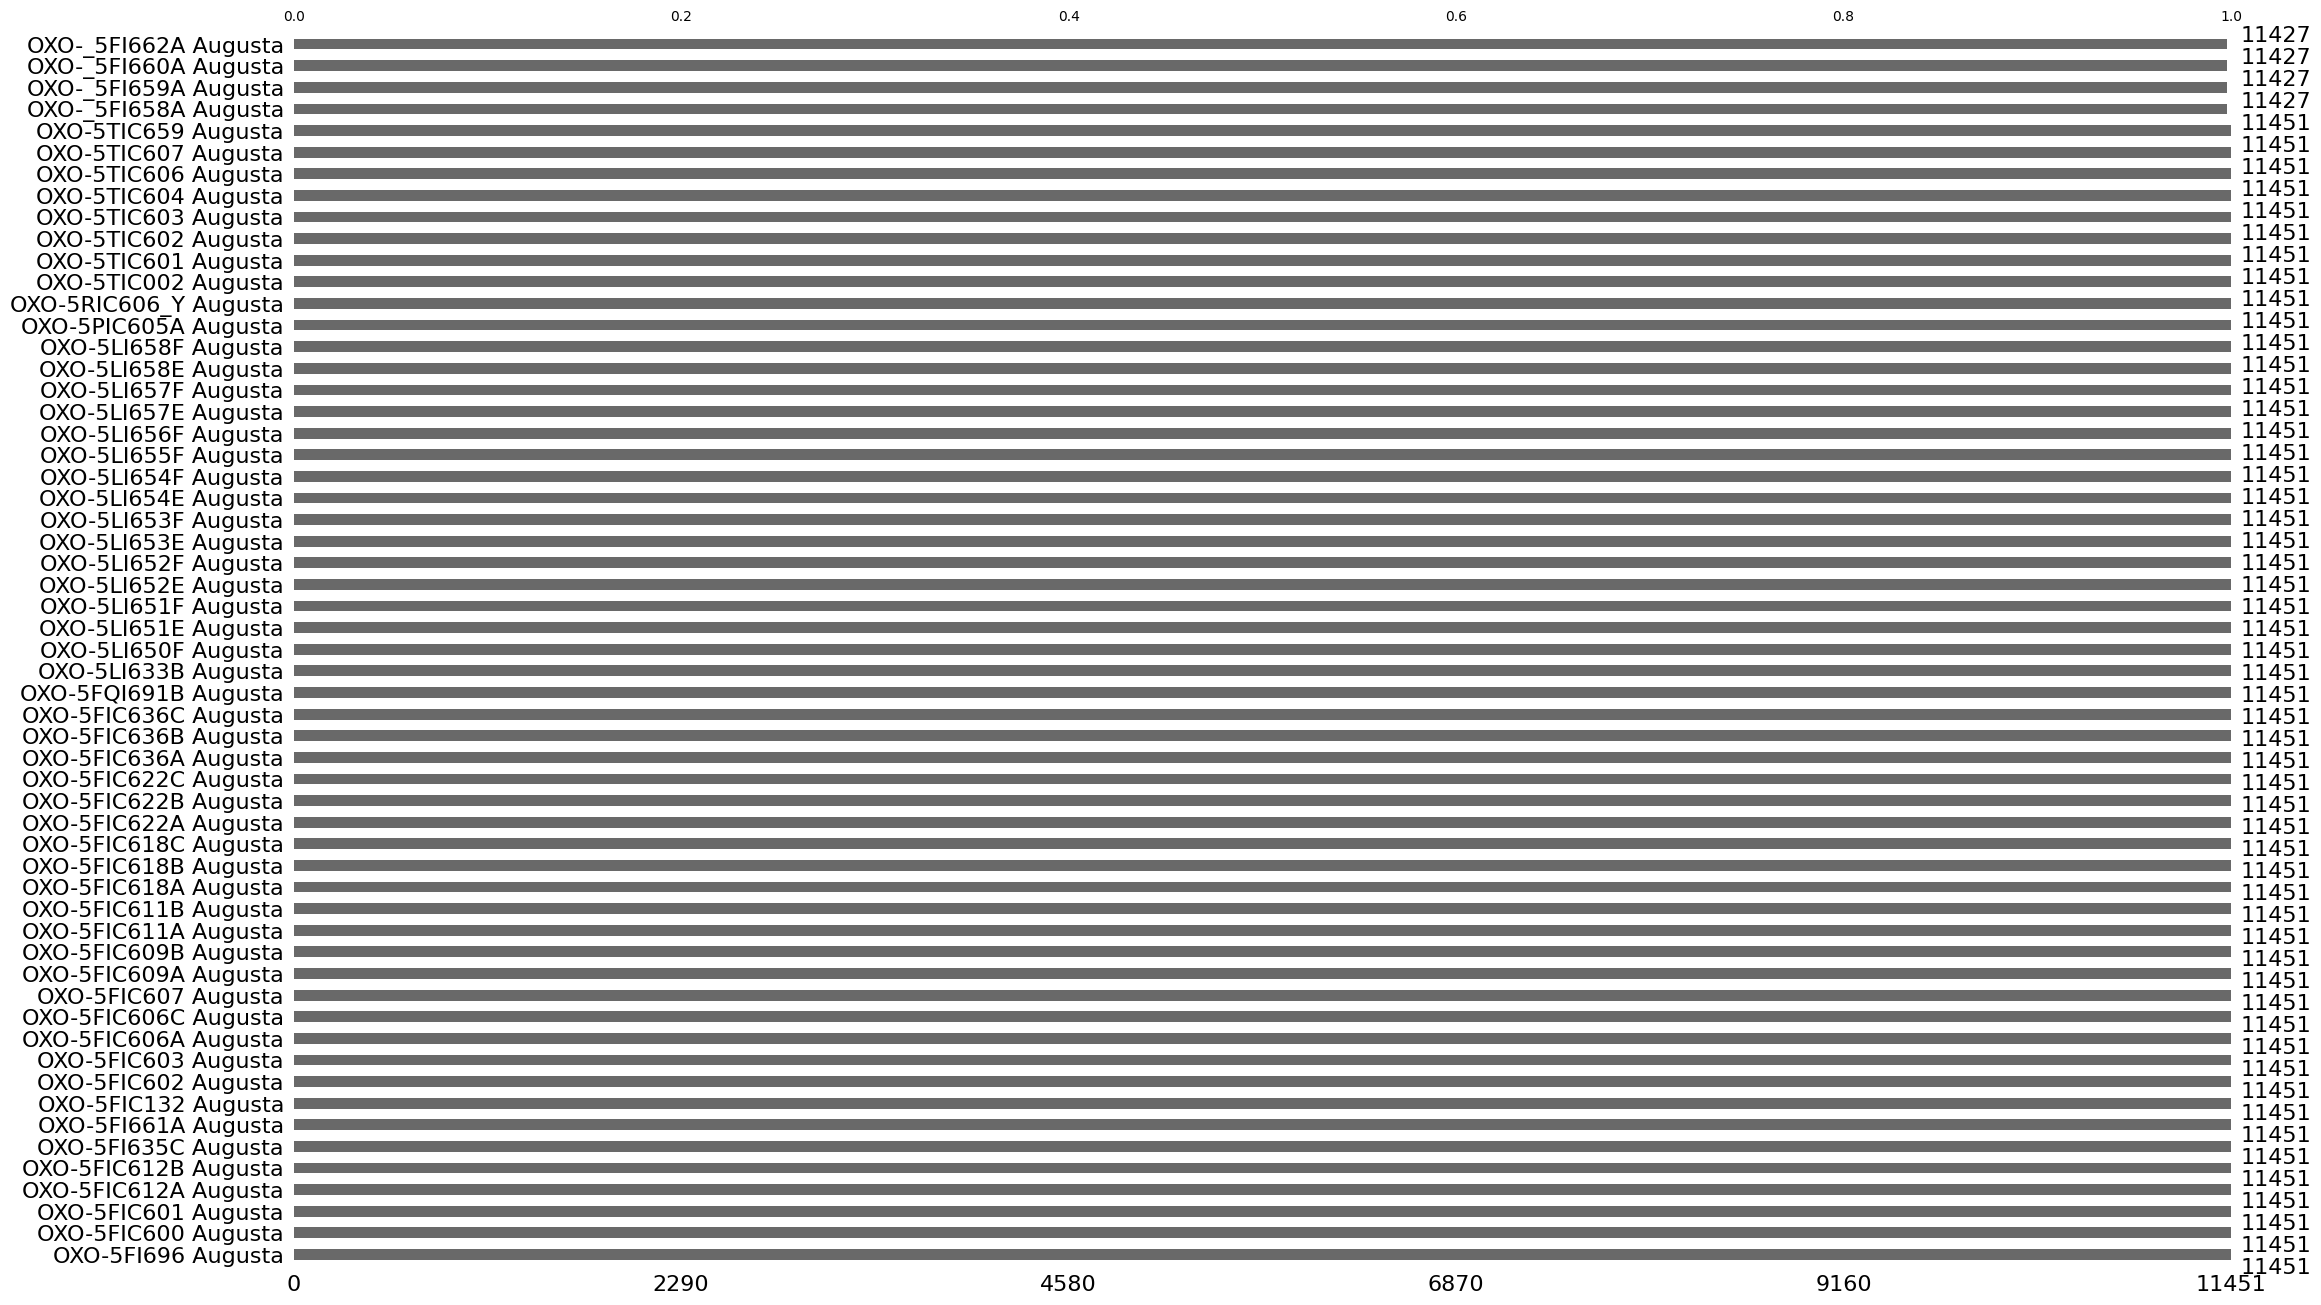

In [137]:
msno.bar(df)
plt.show()

### Target Variables Distribution<a name="clean"></a>

In [138]:
import plotly.express as px

fig = px.line(df, x=df.index, y=target_list)
fig.update_layout(
    width=1200,
    height=600
)
# fig.write_html("./image/target_variables.html")
fig.show()

In [139]:
# find indices where value goes below the threshold
threshold = 2000

zero_indices = df[df[cfg.kpi1.tag1] < threshold].index
print(zero_indices.shape)

# output timestamps
# for index in zero_indices:
#     print(df['Date'][index])

# delete rows
# df = df.drop(zero_indices)

(1446,)


In [140]:
df.shape

(11451, 57)

In [141]:
# Check if rows are deleted successfully
# df.loc[(df.index >= '2021-03-06') & (df.index < '2021-03-07')]

In [142]:
target_list

['OXO-5FI696 Augusta',
 'OXO-5FIC600 Augusta',
 'OXO-5FIC601 Augusta',
 'OXO-5FIC612A Augusta',
 'OXO-5FIC612B Augusta']

KPI1 Variation

In [143]:
# Let's check KPI1
kpi = df[target_list[0]] / ((df[target_list[3]] + df[target_list[4]])*1000 + df[target_list[1]] + df[target_list[2]])
df['kpi1'] = kpi

fig = px.line(df, x=df.index, y=kpi)
fig.update_layout(
    width=1200,
    height=600
)
# fig.write_html("./image/target_variables.html")
fig.show()

In [144]:
# View the value between 0 and 1.5, mark the data points out of [0.84, 0.9] as red

fig = px.line(df, x=df.index, y=kpi)
fig.update_layout(
    width=1200,
    height=600,
    yaxis=dict(range=[0, 1.5])
)
fig.add_shape(
        # Line Horizontal
        type="line",
        x0=df.index[0],
        y0=0.84,
        x1=df.index[-1],
        y1=0.84,
        line=dict(
            color="Red",
            width=2,
            dash="dashdot",
        ),
    )
fig.add_shape(
        # Line Horizontal
        type="line",
        x0=df.index[0],
        y0=0.9,
        x1=df.index[-1],
        y1=0.9,
        line=dict(
            color="Red",
            width=2,
            dash="dashdot",
        ),
    )
# fig.add_trace(go.Scatter(
#     x=df.index,
#     y=kpi,
#     mode="markers",
#     marker=dict(
#         color='rgba(255, 0, 0, 0.5)',
#         size=5,
#         line=dict(
#             color='DarkSlateGrey',
#             width=2
#         )
#     )
# ))

# fig.write_html("./image/target_variables.html")
fig.show()

### Variance Analysis<a name="clean"></a>

In [145]:
std = df.std()
std.shape

(58,)

In [146]:
std

OXO-5FI696 Augusta         3752.001316
OXO-5FIC600 Augusta         721.554245
OXO-5FIC601 Augusta          27.893184
OXO-5FIC612A Augusta          3.184255
OXO-5FIC612B Augusta          3.787462
OXO-5FI635C Augusta        3237.865197
OXO-5FI661A Augusta        9533.058622
OXO-5FIC132 Augusta        3278.233052
OXO-5FIC602 Augusta        2619.185006
OXO-5FIC603 Augusta        2583.616381
OXO-5FIC606A Augusta        487.981346
OXO-5FIC606C Augusta        600.387045
OXO-5FIC607 Augusta         846.265511
OXO-5FIC609A Augusta        870.475297
OXO-5FIC609B Augusta       1057.703005
OXO-5FIC611A Augusta       2326.310430
OXO-5FIC611B Augusta       3432.439416
OXO-5FIC618A Augusta       1743.181329
OXO-5FIC618B Augusta       1588.229098
OXO-5FIC618C Augusta       1870.335248
OXO-5FIC622A Augusta        968.951954
OXO-5FIC622B Augusta       1098.192853
OXO-5FIC622C Augusta       1141.818550
OXO-5FIC636A Augusta       2594.724773
OXO-5FIC636B Augusta       3675.624468
OXO-5FIC636C Augusta     

In [147]:
fig = go.Figure(data=[go.Bar(x=df.columns, y=std)])
fig.update_layout(
    width=1200,
    height=600
)
fig.show()

In [148]:
# Take a look at that weird tag
fig = px.line(df, x=df.index, y='OXO-5FQI691B Augusta')
fig.update_layout(
    width=1200,
    height=600
)
# fig.write_html("./image/target_variables.html")
fig.show()

In [149]:
# It's because the magnitude of the values in that column are large
# Let's try normalized std
norm_std = df.std(ddof=0) / df.mean()
norm_std

OXO-5FI696 Augusta        0.454810
OXO-5FIC600 Augusta       0.403389
OXO-5FIC601 Augusta       0.434898
OXO-5FIC612A Augusta      1.897487
OXO-5FIC612B Augusta      0.603604
OXO-5FI635C Augusta       0.673646
OXO-5FI661A Augusta       0.267536
OXO-5FIC132 Augusta       0.870814
OXO-5FIC602 Augusta       1.039172
OXO-5FIC603 Augusta       0.755993
OXO-5FIC606A Augusta      1.322178
OXO-5FIC606C Augusta      0.980252
OXO-5FIC607 Augusta       1.150669
OXO-5FIC609A Augusta      1.897582
OXO-5FIC609B Augusta      0.607769
OXO-5FIC611A Augusta      2.500972
OXO-5FIC611B Augusta      0.500968
OXO-5FIC618A Augusta      1.687604
OXO-5FIC618B Augusta      0.594232
OXO-5FIC618C Augusta      0.618990
OXO-5FIC622A Augusta      1.601303
OXO-5FIC622B Augusta      0.694147
OXO-5FIC622C Augusta      0.608866
OXO-5FIC636A Augusta      0.818991
OXO-5FIC636B Augusta      1.020582
OXO-5FIC636C Augusta      0.841853
OXO-5FQI691B Augusta      0.399542
OXO-5LI633B Augusta       0.862967
OXO-5LI650F Augusta 

In [150]:
fig = go.Figure(data=[go.Bar(x=df.columns, y=norm_std)])
fig.update_layout(
    width=1200,
    height=600
)
fig.show()

In [151]:
# Take a look at that weird tag

fig = px.line(df, x=df.index, y='OXO-5RIC606_Y Augusta')
fig.update_layout(
    width=1200,
    height=600
)
# fig.write_html("./image/target_variables.html")
fig.show()

In [152]:
# That column has lots of spikes, and also remain in 0 for a long time, so we decided to drop it.
# if tag_dict['OXO-5RIC606_Y Augusta'] != 'Control':
#     df = df.drop(columns=['OXO-5RIC606_Y Augusta'])

# df = df.drop(columns=['OXO-5RIC606_Y Augusta'])
df.shape

(11451, 58)

In [154]:
df.to_csv(cfg.path.new_processed_data)

In [155]:
# Check for extremely small variance

small_std = [x for x in norm_std if x < 0.1]
small_std

[]